BUSINESS UNDERSTANDING

The objective of this assessment is to predict the prices of housing in a simulated market based on the Linear Regression model. The goal of this assessment is to evaluate the price of a house based on its size, number of bedrooms, how old the house is, and the distance to the city center. Using the data set provided, the outcome of this assessment is to understand the relationship between these factors and housing prices, and to make informed predictions about the value of properties in the simulated market.

DATA UNDERSTANDING:

Features:

House_Size: Size of the house in square meters.

Num_Bedrooms: Number of bedrooms in the house.

House_Age: Age of the house in years.

Distance_to_City: Distance to the city center in kilometers.

Target:

Price: Predicted price of the house in a simulated market.
  

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
train_data = pd.read_csv("/content/real_estate_training_data.csv")
score_data = pd.read_csv("/content/real_estate_scoring_data.csv")

train_data.head()

,House_Size,Num_Bedrooms,House_Age,Distance_to_City,Price
0,61.612603,3,21.214844,23.659116,5.065851e+05
1,286.191432,3,36.493015,3.765776,1.552872e+06
2,202.655011,2,2.887053,28.652518,1.192197e+06
3,57.195669,2,45.016063,25.724964,2.908226e+05
4,278.711475,4,28.590458,29.667128,1.731602e+06


In [2]:
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   House_Size        800 non-null    float64
 1   Num_Bedrooms      800 non-null    int64  
 2   House_Age         800 non-null    float64
 3   Distance_to_City  800 non-null    float64
 4   Price             800 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 31.4 KB


,House_Size,Num_Bedrooms,House_Age,Distance_to_City,Price
count,800.000000,800.000000,800.000000,800.000000,8.000000e+02
mean,173.829065,3.055000,25.563417,15.827001,1.067202e+06
std,73.195773,1.430746,14.514750,8.141743,3.975056e+05
min,51.158006,1.000000,0.009420,1.012841,1.951062e+05
25%,109.999922,2.000000,12.826628,9.148973,7.503198e+05
50%,175.664515,3.000000,26.518222,15.939974,1.071068e+06
75%,237.171221,4.000000,37.751604,22.833444,1.373069e+06
max,299.929418,5.000000,49.985690,29.986774,1.970344e+06


In [3]:
score_data.head()

,House_Size,Num_Bedrooms,House_Age,Distance_to_City
0,145.222714,2,13.891104,3.030102
1,254.149860,2,26.361309,14.773578
2,165.669946,5,40.989890,3.169815
3,139.024181,5,41.927461,13.848722
4,287.515492,4,19.487969,11.832085


In [4]:
score_data.info()
score_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   House_Size        200 non-null    float64
 1   Num_Bedrooms      200 non-null    int64  
 2   House_Age         200 non-null    float64
 3   Distance_to_City  200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


,House_Size,Num_Bedrooms,House_Age,Distance_to_City
count,200.000000,200.00000,200.000000,200.000000
mean,167.504432,2.97000,23.772490,16.271103
std,72.345535,1.43506,15.044703,8.553506
min,51.265396,1.00000,0.093994,1.186621
25%,105.053554,2.00000,9.503693,9.365798
50%,167.207506,3.00000,22.538745,16.989464
75%,227.269489,4.00000,36.870737,23.779201
max,297.513463,5.00000,49.806147,29.895551


DATA PREPARATION

When using linear regression as a predictive model, it is extremely important to remember
that the ranges for all attributes in the scoring data must be within the ranges for the
corresponding attributes in the training data. This is because a training data set cannot be
relied upon to predict a target attrtibute for observations whose values fall outside the
training data set’s values.

In [5]:
# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
# Normalize the features (optional, if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop(columns=["Price"]))
y_train = train_data["Price"]
X_score = scaler.transform(score_data)

Missing values in training data:
 House_Size          0
Num_Bedrooms        0
House_Age           0
Distance_to_City    0
Price               0
dtype: int64


MODELING

Linear regression modeling is all about determing how close a given observation is to an imaginary
line representing the average, or center of all points in the data set. That imaginary line gives us the
first part of the term “linear regression”. The formula for calculating a prediction using linear
regression is y=mx+b. You may recognize this from a former algebra class as the formula for
calculating the slope of a line. In this formula, the variable y, is the target, the label, the thing we
want to predict. So in this example, y is the amount of Heating_Oil we expect each
home to consume. But how will we predict y? We need to know what m, x, and b are. The
variable m is the value for a given predictor attribute, or what is sometimes referred to as an
independent variable. The variable x is that attribute’s coefficient. The variable b is
a constant that is added to all linear regression calculations. It is represented by the Intercept.



In [6]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on training data to evaluate the model
train_predictions = model.predict(X_train)
# Evaluate the model
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print(f"Model Performance on Training Data:\nMSE: {mse:.2f}\nR^2: {r2:.2f}")

Model Performance on Training Data:
MSE: 2414820194.45
R^2: 0.98


In [7]:
# Predict on the scoring dataset
score_predictions = model.predict(X_score)
# Save the predictions
score_data["Predicted_Price"] = score_predictions
score_data.to_csv("scoring_results.csv", index=False)
print("Predictions saved to scoring_results.csv")

Predictions saved to scoring_results.csv


In [14]:
scoring_results = pd.read_csv("/content/scoring_results.csv")

scoring_results.describe()

,House_Size,Num_Bedrooms,House_Age,Distance_to_City,Predicted_Price
count,200.000000,200.00000,200.000000,200.000000,2.000000e+02
mean,167.504432,2.97000,23.772490,16.271103,1.031820e+06
std,72.345535,1.43506,15.044703,8.553506,3.909990e+05
min,51.265396,1.00000,0.093994,1.186621,2.037678e+05
25%,105.053554,2.00000,9.503693,9.365798,7.214986e+05
50%,167.207506,3.00000,22.538745,16.989464,1.039679e+06
75%,227.269489,4.00000,36.870737,23.779201,1.322835e+06
max,297.513463,5.00000,49.806147,29.895551,1.859654e+06


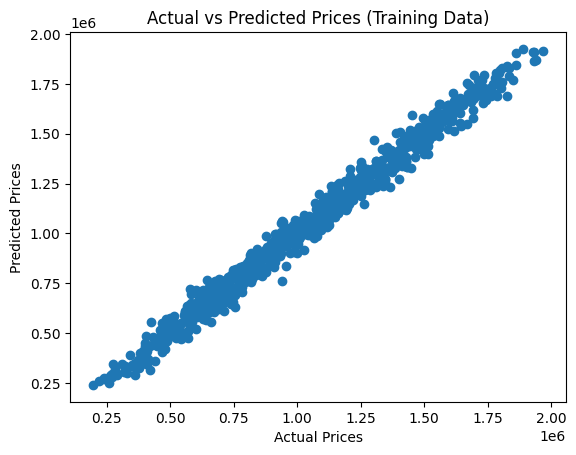

In [8]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_train, train_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data)")
plt.show()

FINDINGS

The predicted housing prices in the dataset show significant variability, ranging from 203,768 to 1,859,654, with an average predicted price of approximately 1,031,820. Larger houses, newer constructions, and those closer to the city center generally have higher predicted prices, while smaller, older, and more remote properties tend to have lower values. The significant standard deviation in predicted prices suggests that these factors collectively contribute to a complex price determination process.